# Notebook originalmente adaptado de Manuel Patiño

# Black-Scholes Model

## Introduction

The Black-Scholes model, also known as the Black-Scholes-Merton model, is a mathematical model for pricing an options contract. Developed in 1973 by economists Fischer Black, Myron Scholes, and later expanded by Robert Merton, the model provides a theoretical estimate of the price of European-style options.

## The Formula

The Black-Scholes formula for a call option is given by:

$$ C(S, t) = S_0 N(d_1) - K e^{-rT} N(d_2) $$

For a put option, the formula is:

$$ P(S, t) = K e^{-rT} N(-d_2) - S_0 N(-d_1) $$

where:

- $C(S, t)$ = Call option price
- $P(S, t)$ = Put option price
- $S_0$ = Current stock price
- $K$ = Strike price of the option
- $T$ = Time to expiration (in years)
- $r$ = Risk-free interest rate (annual rate, expressed in terms of continuous compounding)
- $N(d)$ = Cumulative distribution function of the standard normal distribution
- $d_1 = \frac{ln(\frac{S_0}{X}) + (r + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$
- $d_2 = d_1 - \sigma\sqrt{T}$
- $\sigma$ = Volatility of the stock price (standard deviation of the stock’s returns)

## Components Explained

- **$S_0$ (Current Stock Price):** This is the current price of the stock which the option grants the right to buy or sell.
- **$K$ (Strike Price):** The price at which the holder of the option can buy (in case of a call option) or sell (in case of a put option) the underlying stock.
- **$T$ (Time to Expiration):** The time in years until the option expires and can no longer be exercised.
- **$r$ (Risk-Free Interest Rate):** The theoretical return on a risk-free investment over the option's life. It's used to discount the strike price back to its present value.
- **$\sigma$ (Volatility):** A measure of the amount by which the stock price is expected to fluctuate during the period. High volatility increases the option's price since there is a greater chance it will end up in the money.
- **$N(d)$ (Cumulative Distribution Function):** This part of the formula calculates the probabilities of the option finishing in the money, under the assumption that stock returns are normally distributed.

# Black-Scholes Partial Differential Equation and The Greeks

The Black-Scholes model, a cornerstone of modern financial theory, provides a mathematical framework for valuing European options. Central to this model is the Black-Scholes Partial Differential Equation (PDE), which relates the price of the option to time and the underlying asset's price changes. The equation also incorporates the "Greeks," which are measures of the sensitivity of the option's price to various factors.

## The Black-Scholes PDE

The Black-Scholes PDE is expressed as:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

Where:
- $V = V(S,t)$ represents the option price as a function of the underlying asset price $S$ and time $t$.
- $\frac{\partial V}{\partial t}$ denotes the change in option price with respect to time, related to Theta ($\Theta$).
- $\frac{\partial^2 V}{\partial S^2}$ represents Gamma ($\Gamma$), indicating how Delta ($\Delta$) changes as the underlying asset price changes.
- $\frac{\partial V}{\partial S}$ is associated with Delta ($\Delta$), reflecting the rate of change in the option price per unit change in the underlying asset price.
- $\sigma$ is the volatility of the asset's returns.
- $r$ stands for the risk-free interest rate.

## Connection to The Greeks

### Theta ($\Theta$)

Theta captures the time decay of the option's value, represented by the term $\frac{\partial V}{\partial t}$. It indicates how much the option's price decreases as time moves closer to expiration.

### Delta ($\Delta$) and Gamma ($\Gamma$)

Delta, derived from $\frac{\partial V}{\partial S}$, measures the sensitivity of the option's price to changes in the price of the underlying asset. Gamma, coming from $\frac{\partial^2 V}{\partial S^2}$, measures the rate of change of Delta in response to price movements of the underlying asset.

### Risk-Free Rate ($r$)

The term $rS\frac{\partial V}{\partial S}$ incorporates the risk-free rate and Delta, accounting for the cost of carry in the option's price. The $-rV$ term adjusts for the present value of money.


$$
\Theta + \frac{1}{2} \sigma^2 S^2 \Gamma + rS\Delta - rV = 0
$$

## Understanding the PDE

The Black-Scholes PDE underlies the valuation of European options, assuming a lognormal distribution for stock prices, no arbitrage, constant volatility and interest rates, and continuous hedging. Despite simplifications, the model remains a fundamental tool in financial mathematics and option pricing.



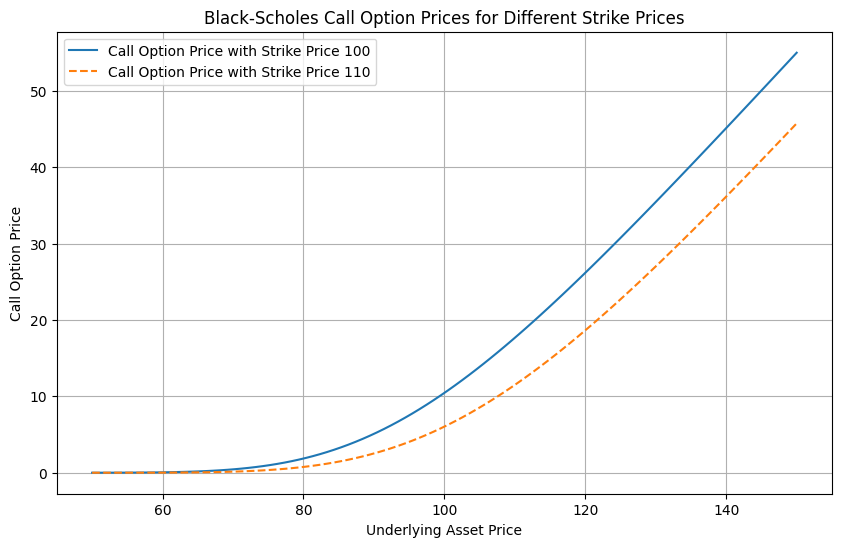

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes formula for a call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters
S = np.linspace(50, 150, 100)  # Underlying asset price range
K1, K2 = 100, 110  # Strike prices for two options
T = 1  # Time to expiration in years
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate call option prices
call_prices_K1 = black_scholes_call(S, K1, T, r, sigma)
call_prices_K2 = black_scholes_call(S, K2, T, r, sigma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, call_prices_K1, label=f'Call Option Price with Strike Price {K1}')
plt.plot(S, call_prices_K2, label=f'Call Option Price with Strike Price {K2}', linestyle='--')
plt.title('Black-Scholes Call Option Prices for Different Strike Prices')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Call Option Price')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import numpy as np
from scipy.stats import norm


# Black-Scholes Formula
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price for a call or put option.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)
    - option_type: 'call' for call option, 'put' for put option

    Returns:
    - Option price
    """
    # Calculations
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Option price calculations
    if option_type == 'call':
        option_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return option_price

# Example parameters
S = 100      # Current stock price
K = 100      # Strike price
T = 1        # Time to expiration in years
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility

# Calculate call and put option prices
call_price = black_scholes(S, K, T, r, sigma, 'call')
put_price = black_scholes(S, K, T, r, sigma, 'put')

print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")


Call Option Price: $10.45
Put Option Price: $5.57


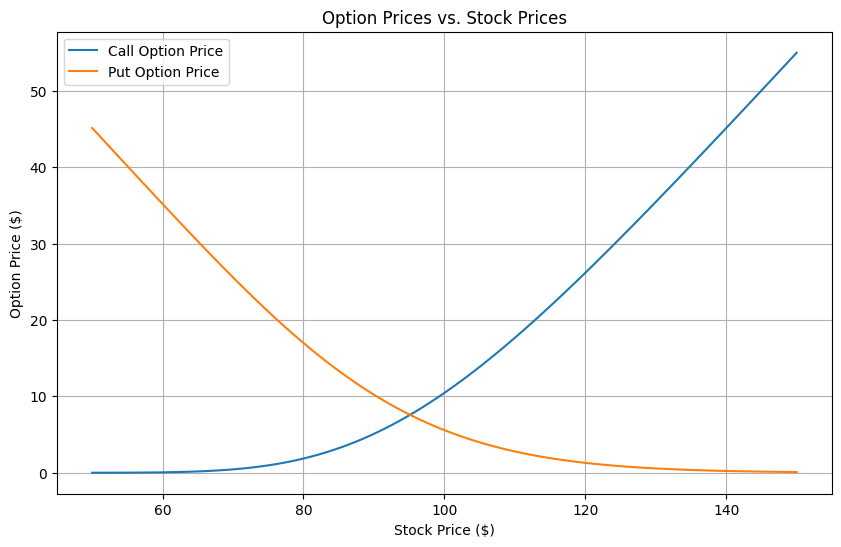

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes Formula
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price for a call or put option.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)
    - option_type: 'call' for call option, 'put' for put option

    Returns:
    - Option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    elif option_type == 'put':
        option_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return option_price

# Parameters
S_range = np.linspace(50, 150, 100)  # Stock price range
K = 100                              # Strike price
T = 1                                # Time to expiration in years
r = 0.05                             # Risk-free interest rate
sigma = 0.2                          # Volatility

# Calculate option prices
call_prices = [black_scholes(S, K, T, r, sigma, 'call') for S in S_range]
put_prices = [black_scholes(S, K, T, r, sigma, 'put') for S in S_range]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_prices, label='Call Option Price')
plt.plot(S_range, put_prices, label='Put Option Price')
plt.title('Option Prices vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Option Price ($)')
plt.legend()
plt.grid(True)
plt.show()


# Understanding the Greeks in the Black-Scholes Model

The "Greeks" are fundamental tools in risk management and option trading strategies. They measure the sensitivity of the option's price to its underlying parameters: the stock price, time, volatility, and interest rates. In the Black-Scholes model, these are denoted by Delta, Gamma, Theta, Vega, and Rho.

## Delta ($\Delta$)

Delta represents the rate of change of the option's price with respect to changes in the underlying asset's price. It can be interpreted as the hedge ratio, or the equivalent position in the underlying asset that would mimic the option's price movement.

- For call options, Delta ranges from 0 to 1.
- For put options, Delta ranges from -1 to 0.

### Formula

For a call option:

$$\Delta_C = N(d_1)$$

For a put option:

$$\Delta_P = N(d_1) - 1$$

Where $N(d_1)$ is the cumulative distribution function of $d_1$ from the Black-Scholes formula.

## Gamma ($\Gamma$)

Gamma measures the rate of change of Delta with respect to changes in the underlying asset's price. It indicates the stability of an option's Delta over time. A high Gamma means that Delta changes rapidly with small changes in the stock price, which can be both an opportunity and a risk.

### Formula

$$\Gamma = \frac{N'(d_1)}{S_0 \sigma \sqrt{T}}$$

Where $N'(d_1)$ is the probability density function of $d_1$.

## Theta ($\Theta$)

Theta represents the rate of change of the option's price with respect to time, holding everything else constant. It's often referred to as the "time decay" of the option, as options lose value as they approach expiration.

### Formula

For a call option:

$$\Theta_C = -\frac{S_0 N'(d_1) \sigma}{2 \sqrt{T}} - rXe^{-rT}N(d_2)$$

For a put option:

$$\Theta_P = -\frac{S_0 N'(d_1) \sigma}{2 \sqrt{T}} + rXe^{-rT}N(-d_2)$$

## Vega ($\nu$)

Vega measures the sensitivity of the option's price to changes in the volatility of the underlying asset. Unlike Delta, Gamma, and Theta, Vega is the same for both call and put options.

### Formula

$$\nu = S_0 \sqrt{T} N'(d_1)$$

Vega indicates how much the option's price changes in response to a 1% change in the underlying asset's volatility.

## Rho ($\rho$)

Rho measures the sensitivity of the option's price to changes in the risk-free interest rate. It is more significant for options that are far from expiration.

### Formula

For a call option:

$$\rho_C = TXe^{-rT}N(d_2)$$

For a put option:

$$\rho_P = -TXe^{-rT}N(-d_2)$$

## Conclusion

The Greeks provide a mathematical framework to manage risk and devise trading strategies. By understanding how the price of an option reacts to different factors, traders can make more informed decisions and hedge their positions effectively.


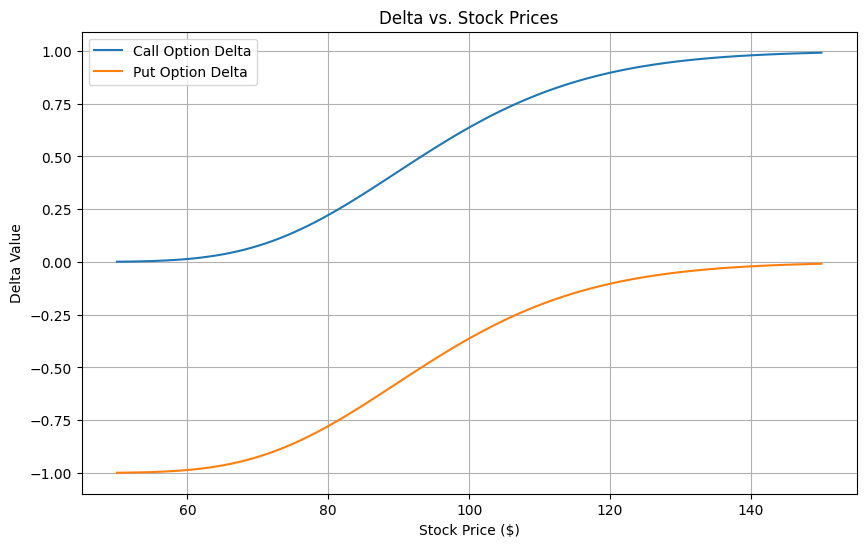

In [16]:
# Delta calculation for Black-Scholes model
def delta(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes Delta for a call or put option.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)
    - option_type: 'call' for call option, 'put' for put option

    Returns:
    - Delta value
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option_type == 'call':
        delta_value = norm.cdf(d1)
    elif option_type == 'put':
        delta_value = norm.cdf(d1) - 1
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return delta_value

# Calculate deltas
call_deltas = [delta(S, K, T, r, sigma, 'call') for S in S_range]
put_deltas = [delta(S, K, T, r, sigma, 'put') for S in S_range]

# Plotting deltas
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_deltas, label='Call Option Delta')
plt.plot(S_range, put_deltas, label='Put Option Delta')
plt.title('Delta vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Delta Value')
plt.legend()
plt.grid(True)
plt.show()


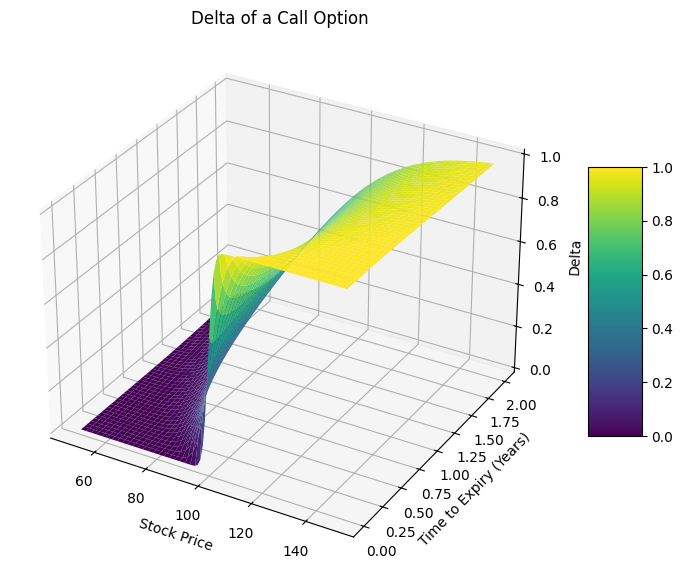

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Black-Scholes Delta for a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Ranges
S = np.linspace(50, 150, 100)  # Price of the underlying asset
T = np.linspace(0.01, 2, 100)  # Time to expiration in years

S, T = np.meshgrid(S, T)  # Create meshgrid for the 3D plot
Delta = delta_call(S, K, T, r, sigma)  # Calculate Delta across the grid

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(S, T, Delta, cmap='viridis', edgecolor='none')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry (Years)')
ax.set_zlabel('Delta')
ax.set_title('Delta of a Call Option')
fig.colorbar(surf, shrink=0.5, aspect=5)  # Add a color bar
plt.show()


In [5]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Black-Scholes Delta for a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Generating data
S_range = np.linspace(50, 150, 100)  # Stock price range
T_range = np.linspace(0.01, 2, 100)  # Time to expiration in years
S, T = np.meshgrid(S_range, T_range)
Delta = delta_call(S, K, T, r, sigma)

# Plotting with Plotly
fig = go.Figure(data=[go.Surface(z=Delta, x=S, y=T)])

fig.update_layout(title='Delta of a Call Option', autosize=False,
                  scene = dict(
                      xaxis_title='Stock Price',
                      yaxis_title='Time to Expiry (Years)',
                      zaxis_title='Delta'),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


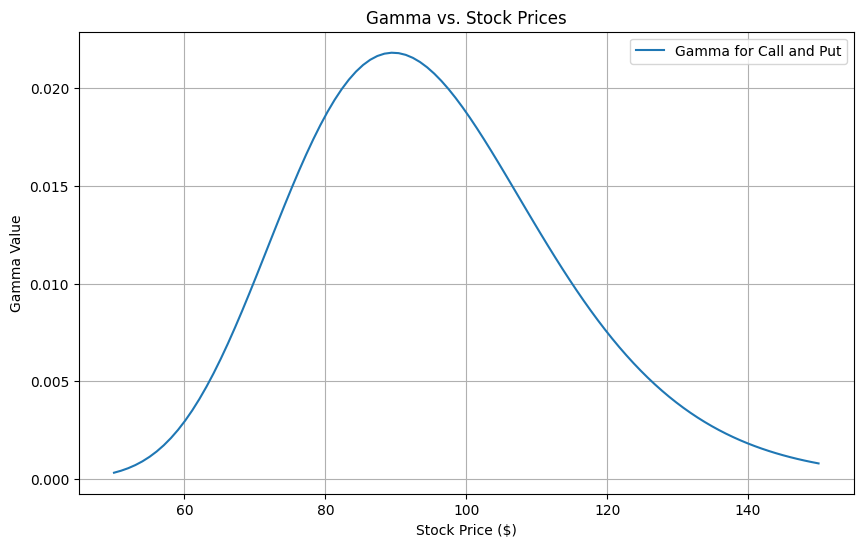

In [18]:
# Gamma calculation for Black-Scholes model
def gamma(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes Gamma for both call and put options (same for both).

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)

    Returns:
    - Gamma value
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma_value = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    return gamma_value

# Calculate gammas (same for call and put)
gammas = [gamma(S, K, T, r, sigma) for S in S_range]

# Plotting gammas
plt.figure(figsize=(10, 6))
plt.plot(S_range, gammas, label='Gamma for Call and Put')
plt.title('Gamma vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Gamma Value')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Black-Scholes Gamma for a call option
def gamma_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Generating data
S_range = np.linspace(50, 150, 100)  # Stock price range
T_range = np.linspace(0.01, 2, 100)  # Time to expiration in years
S, T = np.meshgrid(S_range, T_range)
Gamma = gamma_call(S, K, T, r, sigma)

# Plotting with Plotly
fig = go.Figure(data=[go.Surface(z=Gamma, x=S, y=T)])

fig.update_layout(title='Gamma of a Call Option', autosize=False,
                  scene=dict(
                      xaxis_title='Stock Price',
                      yaxis_title='Time to Expiry (Years)',
                      zaxis_title='Gamma'),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


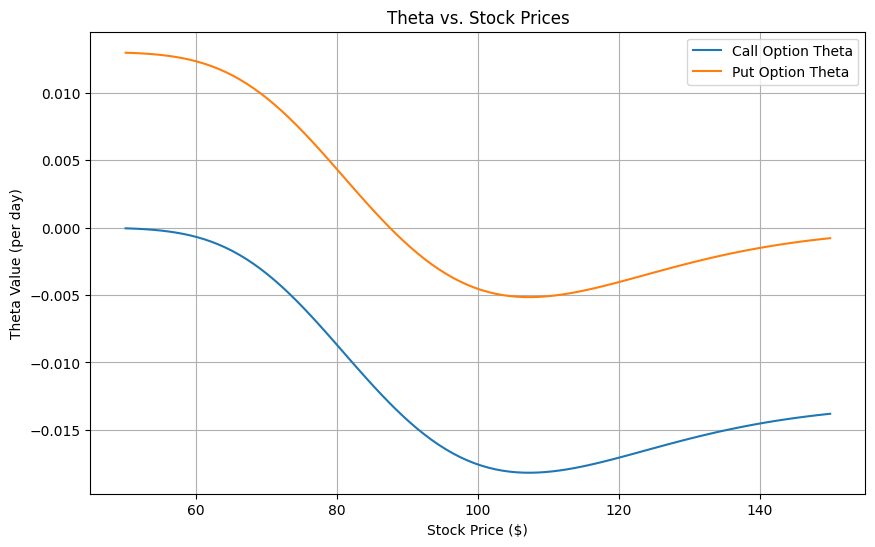

In [19]:
# Theta calculation for Black-Scholes model
def theta(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes Theta for a call or put option.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)
    - option_type: 'call' for call option, 'put' for put option

    Returns:
    - Theta value
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        theta_value = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)) / 365
    elif option_type == 'put':
        theta_value = (-S * norm.pdf(d1) * sigma / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * norm.cdf(-d2)) / 365
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return theta_value

# Calculate thetas
call_thetas = [theta(S, K, T, r, sigma, 'call') for S in S_range]
put_thetas = [theta(S, K, T, r, sigma, 'put') for S in S_range]

# Plotting thetas
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_thetas, label='Call Option Theta')
plt.plot(S_range, put_thetas, label='Put Option Theta')
plt.title('Theta vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Theta Value (per day)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Black-Scholes Theta for a call option
def theta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = -((S * sigma * norm.pdf(d1)) / (2 * np.sqrt(T))) - r * K * np.exp(-r * T) * norm.cdf(d2)
    return theta / 365  # Convert to per-day decay

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Generating data
S_range = np.linspace(50, 150, 100)  # Stock price range
T_range = np.linspace(0.01, 2, 100)  # Time to expiration in years
S, T = np.meshgrid(S_range, T_range)
Theta = theta_call(S, K, T, r, sigma)

# Plotting with Plotly
fig = go.Figure(data=[go.Surface(z=Theta, x=S, y=T)])

fig.update_layout(title='Theta of a Call Option', autosize=False,
                  scene=dict(
                      xaxis_title='Stock Price',
                      yaxis_title='Time to Expiry (Years)',
                      zaxis_title='Theta (Per Day Decay)'),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


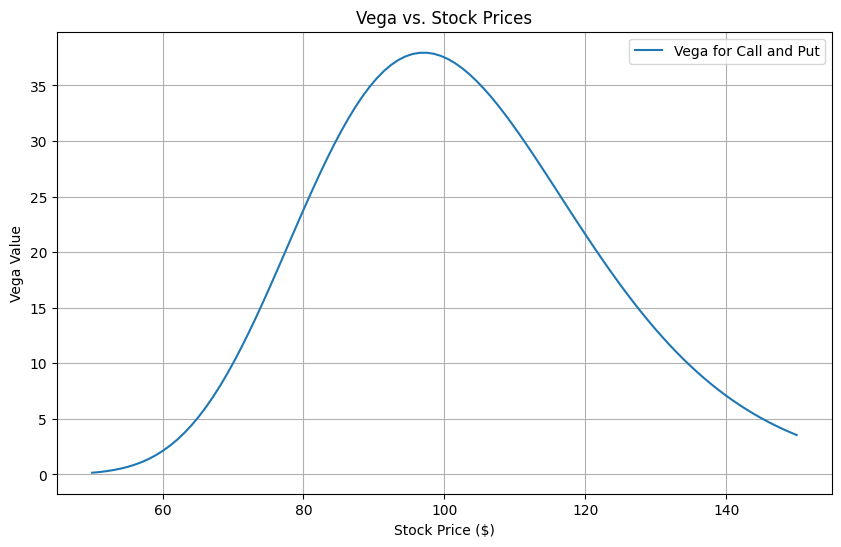

In [20]:
# Vega calculation for Black-Scholes model
def vega(S, K, T, r, sigma):
    """
    Calculate the Black-Scholes Vega for both call and put options (same for both).

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)

    Returns:
    - Vega value
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    vega_value = S * norm.pdf(d1) * np.sqrt(T)
    
    return vega_value

# Calculate vegas (same for call and put)
vegas = [vega(S, K, T, r, sigma) for S in S_range]

# Plotting vegas
plt.figure(figsize=(10, 6))
plt.plot(S_range, vegas, label='Vega for Call and Put')
plt.title('Vega vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Vega Value')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Black-Scholes Vega for a call option
def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * np.sqrt(T) * norm.pdf(d1)

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Generating data
S_range = np.linspace(50, 150, 100)  # Stock price range
T_range = np.linspace(0.01, 2, 100)  # Time to expiration in years
S, T = np.meshgrid(S_range, T_range)
Vega = vega(S, K, T, r, sigma)

# Plotting with Plotly
fig = go.Figure(data=[go.Surface(z=Vega, x=S, y=T)])

fig.update_layout(title='Vega of a Call Option', autosize=False,
                  scene=dict(
                      xaxis_title='Stock Price',
                      yaxis_title='Time to Expiry (Years)',
                      zaxis_title='Vega'),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


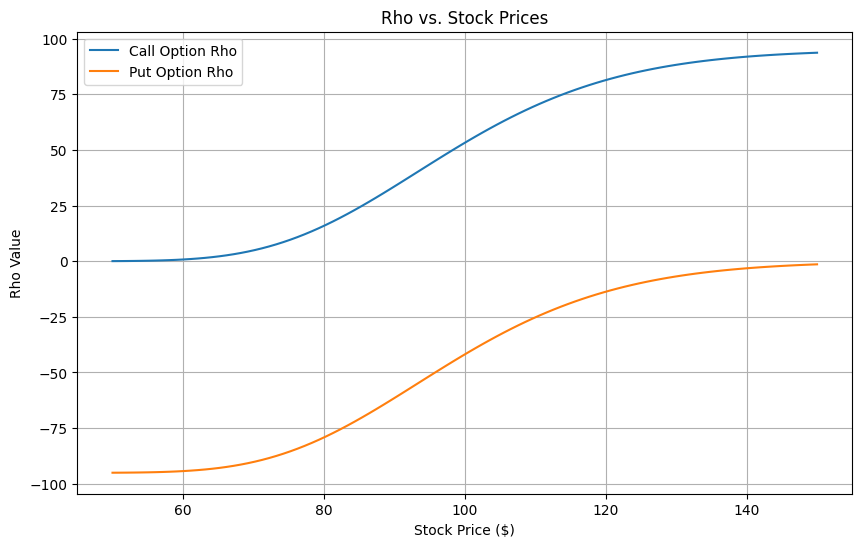

In [21]:
# Rho calculation for Black-Scholes model
def rho(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes Rho for a call or put option.

    Parameters:
    - S: Current stock price
    - K: Strike price
    - T: Time to expiration in years
    - r: Risk-free interest rate (annual)
    - sigma: Volatility of the stock price (annual)
    - option_type: 'call' for call option, 'put' for put option

    Returns:
    - Rho value
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        rho_value = T * K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        rho_value = -T * K * np.exp(-r * T) * norm.cdf(-d2)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return rho_value

# Calculate rhos
call_rhos = [rho(S, K, T, r, sigma, 'call') for S in S_range]
put_rhos = [rho(S, K, T, r, sigma, 'put') for S in S_range]

# Plotting rhos
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_rhos, label='Call Option Rho')
plt.plot(S_range, put_rhos, label='Put Option Rho')
plt.title('Rho vs. Stock Prices')
plt.xlabel('Stock Price ($)')
plt.ylabel('Rho Value')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm

# Black-Scholes Rho for a call option
def rho_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * T * np.exp(-r * T) * norm.cdf(d2)

# Parameters
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility

# Generating data
S_range = np.linspace(50, 150, 100)  # Stock price range
T_range = np.linspace(0.01, 2, 100)  # Time to expiration in years
S, T = np.meshgrid(S_range, T_range)
Rho = rho_call(S, K, T, r, sigma)

# Plotting with Plotly
fig = go.Figure(data=[go.Surface(z=Rho, x=S, y=T)])

fig.update_layout(title='Rho of a Call Option', autosize=False,
                  scene=dict(
                      xaxis_title='Stock Price',
                      yaxis_title='Time to Expiry (Years)',
                      zaxis_title='Rho'),
                  width=700, height=700,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()


# Understanding the Volatility Smile

## Introduction

The volatility smile is a pattern observed in the implied volatilities of options across different strike prices, particularly for a given expiration. When plotted, these implied volatilities tend to form a curve that resembles a smile. This phenomenon challenges the Black-Scholes model's assumption of constant volatility, suggesting that volatility varies with both the strike price and the expiration time of the option.

## Causes of the Volatility Smile

The volatility smile can be attributed to several factors:

1. **Market Sentiment:** Traders' collective actions based on market sentiment can lead to higher demand for out-of-the-money (OTM) call and put options, pushing their prices and implied volatilities higher.

2. **Fat Tails:** Financial returns often exhibit "fat tails" compared to the normal distribution assumed by the Black-Scholes model. This means extreme price movements are more common than the model predicts, affecting the pricing of OTM options.

3. **Stochastic Volatility:** Real-world volatility is not constant as assumed by the Black-Scholes model but varies over time. This can lead to discrepancies between model predictions and observed market prices, reflected in the volatility smile.

4. **Jump Diffusion:** The occurrence of sudden price jumps not accounted for by the Black-Scholes model can also contribute to the formation of the volatility smile.

## Implications

The volatility smile has significant implications for traders, risk managers, and model developers:

1. **Pricing and Hedging:** It indicates that a single implied volatility value cannot accurately price all options on an underlying asset. Models need to account for the skew or smile by adjusting volatility inputs for different strikes and maturities.

2. **Risk Management:** The smile highlights the limitations of the Black-Scholes model in capturing market realities. Risk managers must consider these limitations, especially the potential for extreme market movements, in their strategies.

3. **Model Development:** The existence of the volatility smile has spurred the development of more sophisticated models that can capture the dynamics of implied volatility more accurately. Examples include the Heston model of stochastic volatility and models incorporating jump processes.

## Conclusion

The volatility smile is a crucial concept in options trading, challenging traditional pricing models and highlighting the complex nature of financial markets. Understanding and interpreting the volatility smile is essential for effective trading, pricing, and risk management strategies in the options market.


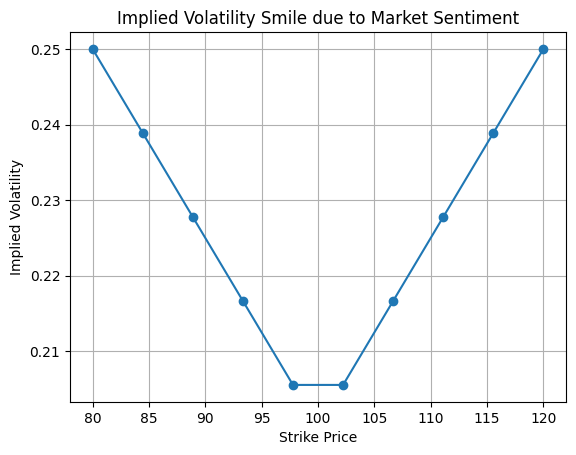

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assume a simplified scenario where demand influences implied volatility
strike_prices = np.linspace(80, 120, 10)
base_volatility = 0.2  # Base volatility for at-the-money (ATM) options

# Simulating increased demand for OTM options, decreasing towards ATM
demand_factor = np.abs(strike_prices - 100) / 20  # Arbitrary demand factor

# Adjusting base volatility by demand factor to simulate market sentiment effect
implied_volatilities = base_volatility + demand_factor * 0.05

# Plotting
plt.plot(strike_prices, implied_volatilities, marker='o')
plt.title('Implied Volatility Smile due to Market Sentiment')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.show()


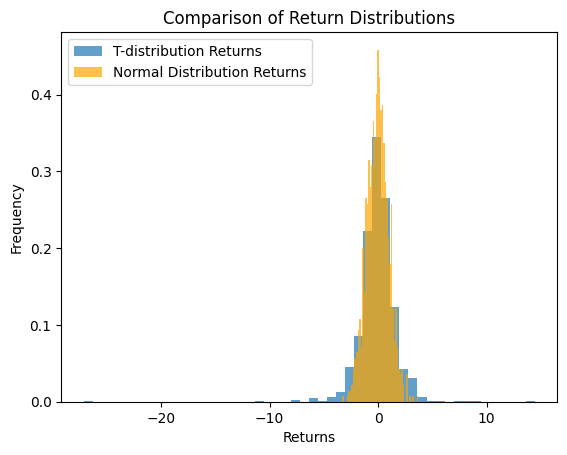

In [11]:
import scipy.stats as ss

# Simulating asset returns with a t-distribution (heavier tails than normal)
returns = ss.t.rvs(df=3, size=1000)  # df=3 degrees of freedom for heavier tails

# Plotting the histogram of returns
plt.hist(returns, bins=50, alpha=0.7, density=True, label='T-distribution Returns')

# Overlaying a normal distribution for comparison
normal_returns = np.random.normal(size=1000)
plt.hist(normal_returns, bins=50, alpha=0.7, density=True, label='Normal Distribution Returns', color='orange')

plt.legend()
plt.title('Comparison of Return Distributions')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()


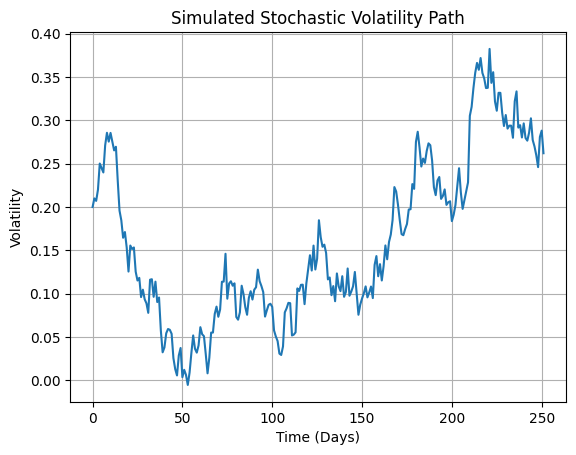

In [12]:
# Simulating stochastic volatility using a simple random walk
np.random.seed(42)
T = 252  # Number of trading days
volatility = np.zeros(T)
volatility[0] = 0.2  # Initial volatility

# Simulate volatility path
for t in range(1, T):
    # Random walk with mean-reverting tendency
    volatility[t] = volatility[t-1] + 0.01 * (0.2 - volatility[t-1]) + np.random.normal(scale=0.02)

# Plotting
plt.plot(volatility)
plt.title('Simulated Stochastic Volatility Path')
plt.xlabel('Time (Days)')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()


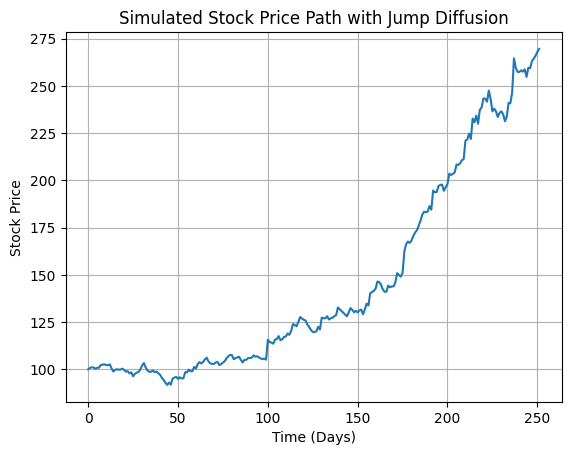

In [13]:
# Simulating a stock price path with jumps
S0 = 100  # Initial stock price
mu = 0.1  # Drift
sigma = 0.2  # Volatility
T = 252  # Time period in days
dt = 1/T  # Time step
jumps = np.random.normal(0.05, 0.02, size=T) * (np.random.rand(T) < 0.05).astype(int)  # Random jumps

# Simulating the stock price path
price_path = [S0]
for t in range(1, T):
    daily_return = np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.random.normal() * np.sqrt(dt) + jumps[t])
    price_path.append(price_path[-1] * daily_return)

# Plotting
plt.plot(price_path)
plt.title('Simulated Stock Price Path with Jump Diffusion')
plt.xlabel('Time (Days)')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


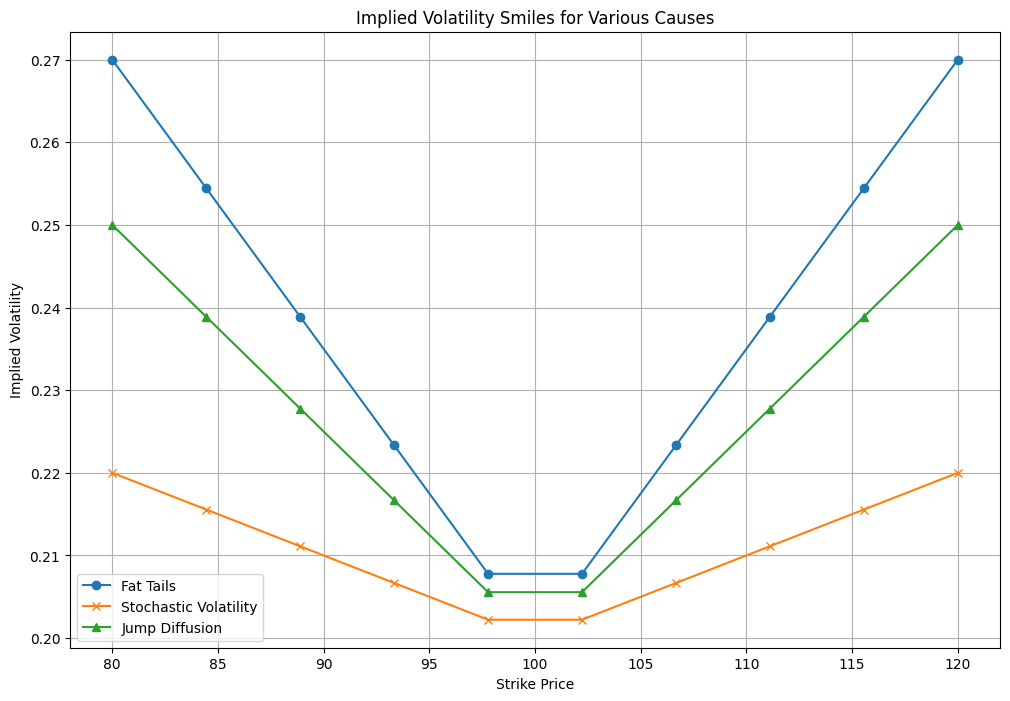

In [14]:
# Setting up the environment for the examples
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Example 2: Fat Tails - Adjusting implied volatility based on fat tails
strike_prices_fat_tails = np.linspace(80, 120, 10)
base_volatility_fat_tails = 0.2  # Base volatility for at-the-money (ATM) options
fat_tails_factor = np.abs(strike_prices_fat_tails - 100) / 20  # Arbitrary factor for fat tails
implied_volatilities_fat_tails = base_volatility_fat_tails + fat_tails_factor * 0.07  # Increased adjustment for fat tails

# Example 3: Stochastic Volatility - Assuming volatility increases towards the ATM option
strike_prices_stochastic = np.linspace(80, 120, 10)
base_volatility_stochastic = 0.2
stochastic_volatility_factor = np.abs(strike_prices_stochastic - 100) / 20
implied_volatilities_stochastic = base_volatility_stochastic + stochastic_volatility_factor * 0.02  # Lesser adjustment for stochastic

# Example 4: Jump Diffusion - Considering jumps increase the implied volatility especially for OTM options
strike_prices_jump = np.linspace(80, 120, 10)
base_volatility_jump = 0.2
jump_diffusion_factor = np.abs(strike_prices_jump - 100) / 20
implied_volatilities_jump = base_volatility_jump + jump_diffusion_factor * 0.05  # Adjusted for jump diffusion effects

# Plotting the implied volatility smiles for each cause
plt.figure(figsize=(12, 8))

plt.plot(strike_prices_fat_tails, implied_volatilities_fat_tails, marker='o', label='Fat Tails')
plt.plot(strike_prices_stochastic, implied_volatilities_stochastic, marker='x', label='Stochastic Volatility')
plt.plot(strike_prices_jump, implied_volatilities_jump, marker='^', label='Jump Diffusion')

plt.title('Implied Volatility Smiles for Various Causes')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


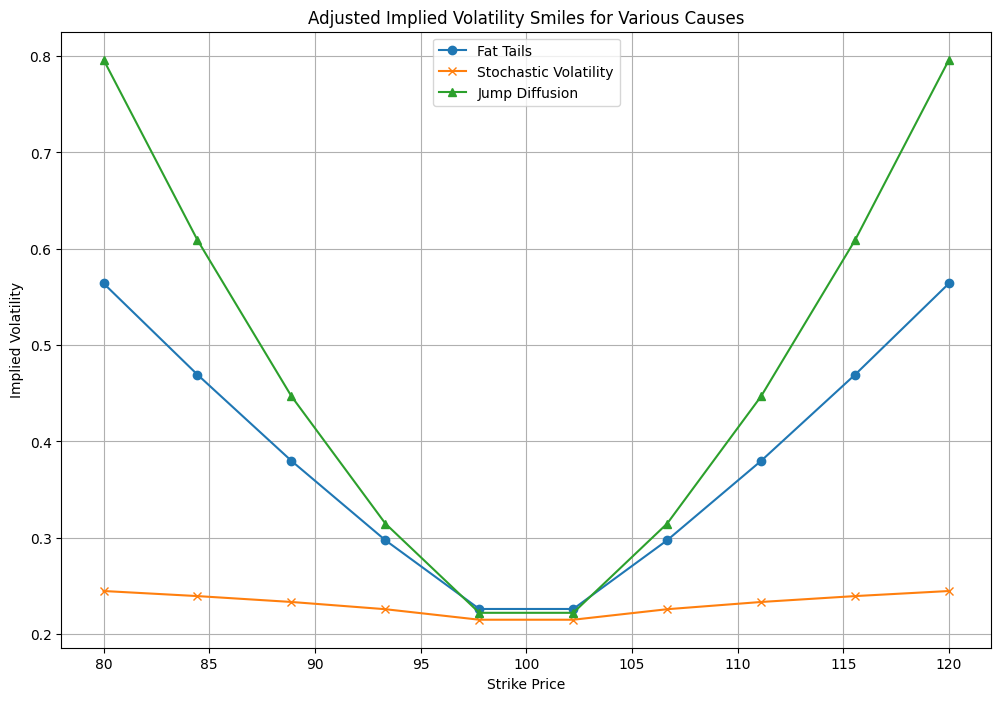

In [15]:
# Adjusting implied volatilities to better reflect the causes of the volatility smile
strike_prices = np.linspace(80, 120, 10)
base_volatility = 0.2  # Base volatility

# Fat Tails - more pronounced increase for both ITM and OTM options
fat_tails_iv = base_volatility + ((np.abs(strike_prices - 100) ** 1.2) / 100)

# Stochastic Volatility - moderate increase, broader around ATM
stochastic_volatility_iv = base_volatility + ((np.abs(strike_prices - 100) ** 0.5) / 100)

# Jump Diffusion - asymmetrical, focusing on OTM options
jump_diffusion_iv = base_volatility + ((np.abs(strike_prices - 100) ** 1.5) / 150)

# Plotting the adjusted implied volatility smiles
plt.figure(figsize=(12, 8))

plt.plot(strike_prices, fat_tails_iv, marker='o', label='Fat Tails')
plt.plot(strike_prices, stochastic_volatility_iv, marker='x', label='Stochastic Volatility')
plt.plot(strike_prices, jump_diffusion_iv, marker='^', label='Jump Diffusion')

plt.title('Adjusted Implied Volatility Smiles for Various Causes')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()


# The Volatility Surface

The volatility surface is a three-dimensional representation that illustrates the implied volatility of options for various strike prices and expiration times. This complex visual tool is vital for understanding market perceptions and the pricing of options.

## Components of the Volatility Surface

1. **X-Axis (Strike Price):** Represents different strike prices for options, showing how implied volatility changes with options' moneyness (ITM, ATM, OTM).
2. **Y-Axis (Expiration Time):** Displays the time to expiration for options, revealing how the market's expectations of volatility change over time.
3. **Z-Axis (Implied Volatility):** The vertical axis indicates the level of implied volatility, with higher points suggesting greater expected volatility of the underlying asset.

## Insights from the Volatility Surface

- **Market Sentiment:** The shape of the volatility surface can shed light on market expectations, with certain patterns indicating the anticipation of higher volatility for specific option contracts.
- **Arbitrage Opportunities:** Irregularities in the surface may expose pricing inefficiencies, offering chances for arbitrage.
- **Dynamic Nature:** The surface is constantly evolving with market conditions, requiring continuous updates for accurate application.

## Importance in Financial Modeling

The volatility surface corrects a key limitation of traditional option pricing models, such as Black-Scholes, which assume constant volatility. It provides a nuanced perspective necessary for accurate pricing and strategic hedging.

## Challenges

- **Construction:** Accurately building a volatility surface involves complex data interpolation and extrapolation techniques due to market data irregularities.
- **Application:** Utilizing the surface for option pricing and risk management demands dynamic adjustment to reflect the latest market conditions.

## Conclusion

Understanding and applying the volatility surface is crucial for sophisticated options trading and risk management strategies. It offers a comprehensive view of how implied volatility varies across different strikes and maturities, revealing much about market dynamics and sentiment.


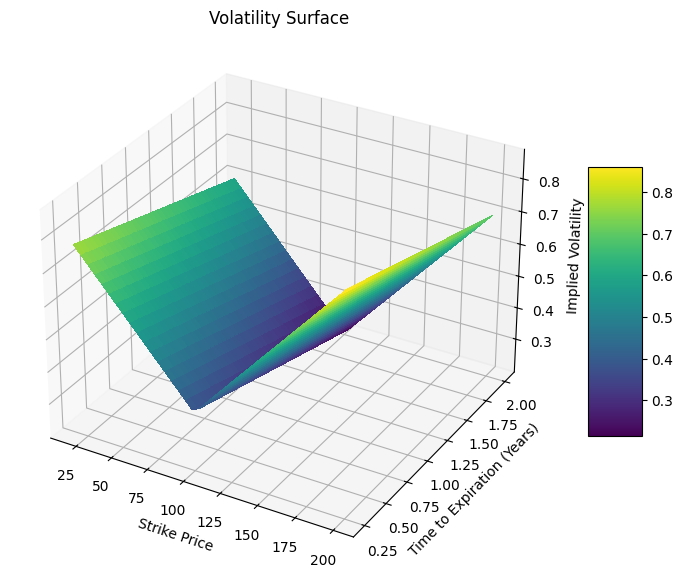

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate mock data for the volatility surface
strike_prices = np.linspace(20, 200, 40)  # Strike prices range
time_to_expiration = np.linspace(0.25, 2, 40)  # Time to expiration in years

# Create a grid of strike price and expiration time values
strike_grid, expiration_grid = np.meshgrid(strike_prices, time_to_expiration)

# Generate a mock implied volatility surface
# Scenario: Volatility increases as we move away from ATM (strike price = 100) and as options near expiration
base_volatility = 0.2
volatility_surface = base_volatility + 0.1 * np.abs(strike_grid - 100) / 20 + 0.1 * (2 - expiration_grid)

# Plotting the volatility surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(strike_grid, expiration_grid, volatility_surface, cmap='viridis',
                       linewidth=0, antialiased=False)

ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Expiration (Years)')
ax.set_zlabel('Implied Volatility')
ax.set_title('Volatility Surface')

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


# The VIX Index: Understanding the Market's Fear Gauge

## Introduction

The VIX Index, or Volatility Index, is a real-time market index representing the market's expectations for volatility over the coming 30 days. Created by the Chicago Board Options Exchange (CBOE) in 1993, the VIX provides a measure of market risk and investors' sentiments. It is often referred to as the "fear gauge" or "fear index" because it typically rises when market uncertainty, stress, or fear increase.

## Calculation of the VIX

The VIX is calculated using the bid and ask prices of S&P 500 index options. It measures the market's expectation of 30-day forward-looking volatility derived from the weighted prices of S&P 500 puts and calls over a wide range of strike prices. In essence, the VIX is a volatility of volatility, indicating the expected annualized change in the S&P 500 index over the next 30 days, with a 68% confidence level (one standard deviation).

## Significance of the VIX

- **Market Sentiment:** A high VIX value indicates increased fear among investors, suggesting that they expect significant changes in market conditions. Conversely, a low VIX value suggests confidence or complacency in the current market direction.
- **Volatility Predictions:** While the VIX itself is derived from volatility, it also predicts future volatility. High levels of VIX indicate that significant market movements are expected, which can be upward or downward.
- **Hedging Tool:** Investors and traders use the VIX to hedge against market downturns. Products based on the VIX, such as futures and options, allow for direct hedging against volatility.

## Applications of the VIX

1. **Market Analysis:** Analysts use the VIX to understand market sentiment and potential shifts in market trends.
2. **Investment Decision Making:** Investors may adjust their portfolio strategies based on VIX levels, increasing their holdings in safer assets when the VIX is high.
3. **Trading Strategies:** Traders use VIX-related products to speculate on changes in volatility or to hedge other investments.

## Conclusion

The VIX Index plays a crucial role in the financial markets by providing a quantifiable measure of market volatility and investor sentiment. Its movements are closely watched by market participants, offering insights into potential market changes and serving as a tool for hedging and speculation.


[*********************100%%**********************]  1 of 1 completed

/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


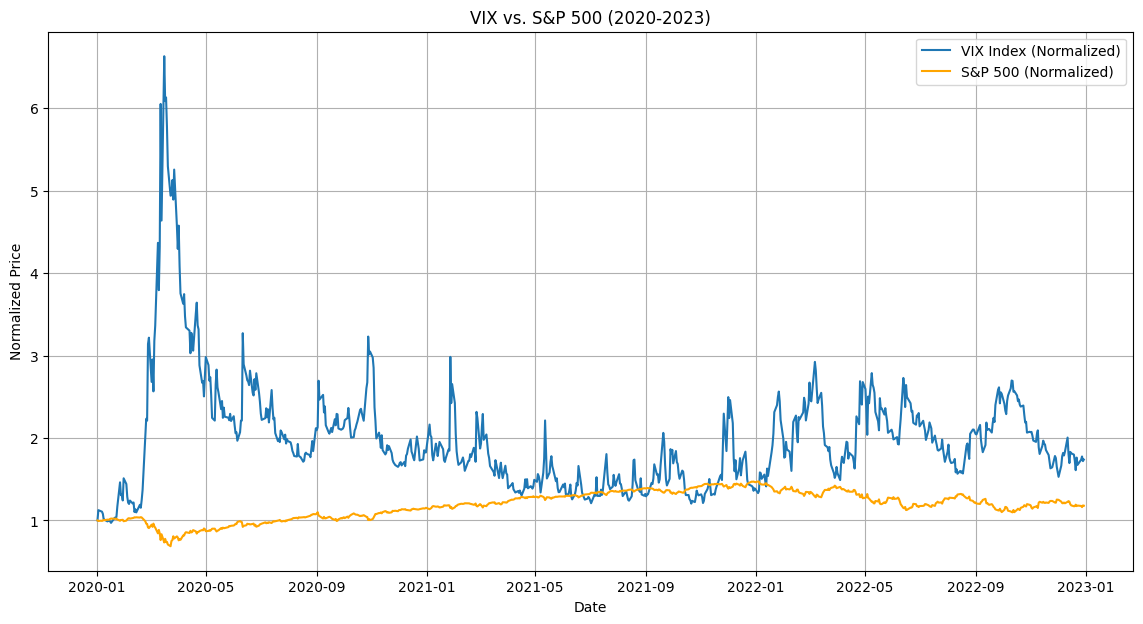

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the date range
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download VIX and S&P 500 data
vix_data = yf.download('^VIX', start=start_date, end=end_date)
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Normalize the data
vix_data_normalized = (vix_data['Close'] / vix_data['Close'].iloc[0]) * 100
sp500_data_normalized = (sp500_data['Close'] / sp500_data['Close'].iloc[0]) * 100

# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(vix_data_normalized, label='VIX Index (Normalized)')
plt.plot(sp500_data_normalized, label='S&P 500 (Normalized)', color='orange')
plt.title('VIX vs. S&P 500 (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  1 of 1 completed

/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed

/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


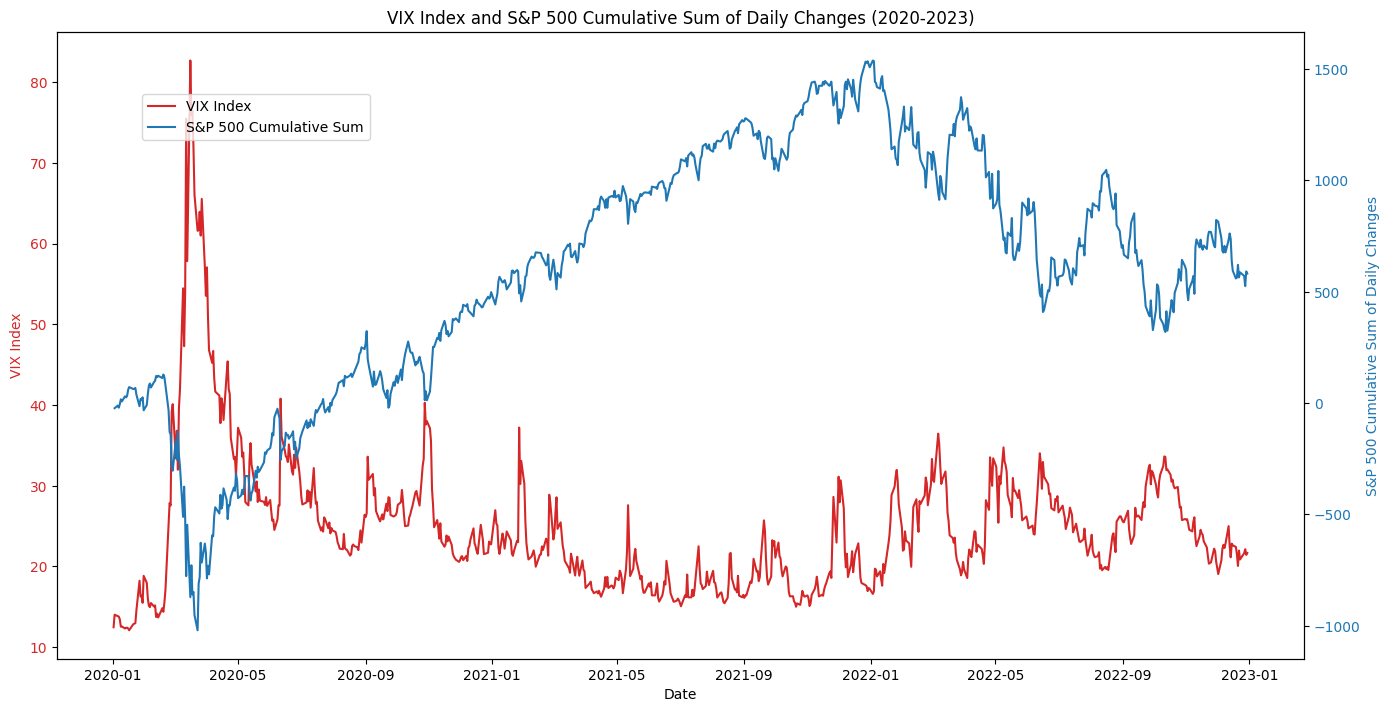

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the date range
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download VIX and S&P 500 data
vix_data = yf.download('^VIX', start=start_date, end=end_date)
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate the cumulative sum of daily changes for S&P 500
sp500_daily_changes = sp500_data['Close'].diff()
sp500_cumulative_sums = sp500_daily_changes.cumsum()

# Creating the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the VIX Index on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX Index', color=color)
ax1.plot(vix_data.index, vix_data['Close'], label='VIX Index', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for the cumulative sum of S&P 500
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Cumulative Sum of Daily Changes', color=color)
ax2.plot(sp500_data.index, sp500_cumulative_sums, label='S&P 500 Cumulative Sum', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding titles and legend
fig.tight_layout()  # To ensure there's no clipping of ylabel
plt.title('VIX Index and S&P 500 Cumulative Sum of Daily Changes (2020-2023)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()


[*********************100%%**********************]  1 of 1 completed

/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')



[*********************100%%**********************]  1 of 1 completed


/opt/homebrew/lib/python3.11/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


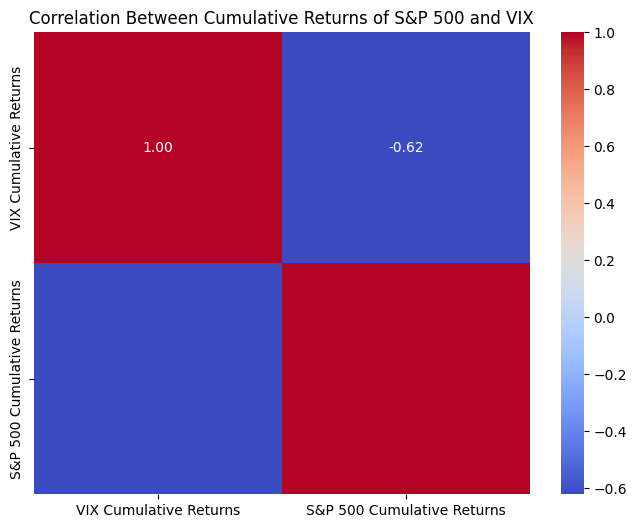

In [30]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the date range
start_date = '2020-01-01'
end_date = '2023-01-01'

# Download VIX and S&P 500 data
vix_data = yf.download('^VIX', start=start_date, end=end_date)
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

# Calculate daily returns (percentage change)
vix_returns = vix_data['Close'].pct_change()
sp500_returns = sp500_data['Close'].pct_change()

# Calculate cumulative returns
vix_cumulative_returns = (1 + vix_returns).cumprod() - 1
sp500_cumulative_returns = (1 + sp500_returns).cumprod() - 1

# Ensure both Series have the same length and align dates
combined_returns = pd.DataFrame({
    'VIX Cumulative Returns': vix_cumulative_returns,
    'S&P 500 Cumulative Returns': sp500_cumulative_returns
}).dropna()

# Calculate the correlation matrix
correlation_matrix = combined_returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Cumulative Returns of S&P 500 and VIX')
plt.show()
